 #                                       Steam Sales Data Analysis 

### Goal of the proect
The main task is to analyse steam_games data set, find dependencies, correlations and other useful information regarding the data

### Scope of the project
During this project I will go through different stages with which every data analyst faces on a daily basis. First of all, we have to import libraries that will be used later and take a brief look on data set. Next, I will go through data cleaning and data preparation, unfortunetely data set has a lot of missing values. Also, some columns are not usefull or have values with which hard to work, the task will be to transform data in such way that it will be easy to work with. Later on, data visualisation and analysing it will take place, it will help us to understand our data more. In the end we we will sum up everything that we learned from this data set 

# Please note that this data set can have wrong data (wrong price, release date, etc).

## Import libraries and data 

In [378]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 50

In [379]:
#read data file 
df=pd.read_csv('steam_games.csv')

## First look on data 

In [380]:
#take a look at what we have
df.head(15)

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
5,https://store.steampowered.com/bundle/5699/Gra...,bundle,Grand Theft Auto V: Premium Online Edition,Grand Theft Auto V: Premium Online Edition bundle,NaN,NaN,NaN,Rockstar North,Rockstar Games,NaN,"Single-player,Multi-player,Downloadable Conten...","English, French, Italian, German, Spanish - Sp...",NaN,"Action,Adventure",NaN,NaN,NaN,NaN,NaN,$35.18
6,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"The ultimate Devil Hunter is back in style, in...","Very Positive,(408),- 87% of the 408 user revi...","Very Positive,(9,645

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40833 entries, 0 to 40832
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       40833 non-null  object 
 1   types                     40831 non-null  object 
 2   name                      40817 non-null  object 
 3   desc_snippet              27612 non-null  object 
 4   recent_reviews            2706 non-null   object 
 5   all_reviews               28470 non-null  object 
 6   release_date              37654 non-null  object 
 7   developer                 40490 non-null  object 
 8   publisher                 35733 non-null  object 
 9   popular_tags              37888 non-null  object 
 10  game_details              40313 non-null  object 
 11  languages                 40797 non-null  object 
 12  achievements              12194 non-null  float64
 13  genre                     40395 non-null  object 
 14  game_d

##  Data Cleaning and Data Preparation

In [382]:
df.types.value_counts()

app       38021
bundle     2572
sub         238
Name: types, dtype: int64

For column 'type' we have values: app, bundle and sub. There is no need to store data about sub and bundle because the task is to analyze  games. The only needed value to keep is 'app'

In [383]:
df[df['types']=='bundle']

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
5,https://store.steampowered.com/bundle/5699/Gra...,bundle,Grand Theft Auto V: Premium Online Edition,Grand Theft Auto V: Premium Online Edition bundle,NaN,NaN,NaN,Rockstar North,Rockstar Games,NaN,"Single-player,Multi-player,Downloadable Conten...","English, French, Italian, German, Spanish - Sp...",NaN,"Action,Adventure",NaN,NaN,NaN,NaN,NaN,$35.18
15,https://store.steampowered.com/bundle/5641/Hea...,bundle,Hearts of Iron IV: Mobilization Pack,Hearts of Iron IV: Mobilization Pack bundle,NaN,NaN,NaN,Paradox Development Studio,Paradox Interactive,NaN,"Single-player,Multi-player,Online Multi-Player...","English, French, German, Polish, Portuguese - ...",NaN,"Simulation,Strategy",NaN,NaN,NaN,NaN,NaN,$94.45
25,https://store.steampowered.com/bundle/234/Port...,bundle,Portal Bundle,Portal Bundle bundle,NaN,NaN,NaN,Valve,Valve,NaN,"Single-player,Co-op,Steam Achievements,Full co...","English, French, German, Russian, Danish, Dutc...",NaN,"Action,Adventure",NaN,NaN,NaN,NaN,NaN,$14.98
44,https://store.steampowered.com/bundle/2405/The...,bundle,The Binding of Isaac: Rebirth Complete Bundle,The Binding of Isaac: Rebirth Complete Bundle ...,NaN,NaN,NaN,"Nicalis, Inc.","Nicalis, Inc.",NaN,"Single-player,Multi-player,Local Multi-Player,...",English,NaN,"Action,Adventure,Indie",NaN,NaN,NaN,NaN,NaN,$35.97
57,https://store.steampowered.com/bundle/6186/Ste...,bundle,Stellaris: Ascension Pack,Stellaris: Ascension Pack bundle,NaN,NaN,NaN,Paradox Development Studio,Paradox Interactive,NaN,"Single-player,Multi-player,Cross-Platform Mult...","English, French, German, Spanish - Spain, Poli...",NaN,"Simulation,Strategy",NaN,NaN,NaN,NaN,NaN,$69.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38837,https://store.steampowered.com/bundle/10428/Qu...,bundle,Quixzel Rush Christmas Helper Pack,Quixzel Rush Christmas Helper Pack bundle,NaN,NaN,NaN,Red Dolphin Games,VT Publishing,NaN,"Single-player,Downloadable Content",English,NaN,"Action,Casual,Indie",NaN,NaN,NaN,NaN,$14.97,$7.32
39264,https://store.steampowered.com/bundle/7250/201...,bundle,2017 Suzuki Vehicle Bundle,2017 Suzuki Vehicle Bundle bundle,NaN,NaN,NaN,Rainbow Studios,THQ Nordic,NaN,"Single-player,Multi-player,Online Multi-Player...","English, French, Italian, German, Spanish - Sp...",NaN,"Racing,Simulation,Sports",NaN,NaN,NaN,NaN,NaN,$5.01
39365,https://store.steampowered.com/bundle/8092/201...,bundle,2018 Yamaha UTV Bundle,2018 Yamaha UTV Bundle bundle,NaN,NaN,NaN,Rainbow Studios,THQ Nordic,NaN,"Single-player,Multi-player,Online Multi-Player...","English, French, Italian, German, Spanish - Sp...",NaN,"Racing,Simulation,Sports",NaN,NaN,NaN,NaN,NaN,$6.08
39366,https://store.steampowered.com/bundle/4380/Blu...,bundle,Blue Reflection - Vacation Style Complete Set,Blue Reflection - Vacation Style Complete Set ...,NaN,NaN,NaN,"KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.",NaN,"Single-player,Downloadable Content,Steam Achie...","English, Japanese, Traditional Chinese",NaN,RPG,NaN,NaN,NaN,NaN,NaN,$23.95


In [384]:
df[df['types']=='sub']

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
39,https://store.steampowered.com/sub/18397/,sub,Doom Classic Complete,Doom Classic Complete bundle,NaN,NaN,NaN,id Software,id Software,NaN,"Single-player,Multi-player,Steam Cloud",English,NaN,Action,NaN,NaN,NaN,NaN,$14.99,$7.49
63,https://store.steampowered.com/sub/281610/,sub,RESIDENT EVIL 2 / BIOHAZARD RE:2 Deluxe Edition,RESIDENT EVIL 2 / BIOHAZARD RE:2 Deluxe Editio...,NaN,NaN,NaN,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.",NaN,"Single-player,Downloadable Content,Steam Achie...","English, French, Italian, German, Spanish - Sp...",NaN,Action,NaN,NaN,NaN,NaN,$69.99,$59.99
216,https://store.steampowered.com/sub/183038/,sub,Dishonored: Death of the Outsider - Deluxe Bundle,Dishonored: Death of the Outsider - Deluxe Bun...,NaN,NaN,NaN,Arkane Studios,Bethesda Softworks,NaN,"Single-player,Steam Achievements,Full controll...","English, French, Italian, German, Spanish - Sp...",NaN,Action,NaN,NaN,NaN,NaN,$59.99,$29.99
241,https://store.steampowered.com/sub/183039/,sub,Dishonored: Complete Collection,Dishonored: Complete Collection bundle,NaN,NaN,NaN,Arkane Studios,Bethesda Softworks,NaN,"Single-player,Downloadable Content,Steam Achie...",English,NaN,"Action,Adventure",NaN,NaN,NaN,NaN,$79.99,$39.99
264,https://store.steampowered.com/sub/62587/,sub,Wolfenstein: The Two Pack,Wolfenstein: The Two Pack bundle,NaN,NaN,NaN,Machine Games,Bethesda-Soft,NaN,"Single-player,Steam Achievements,Partial Contr...","English, French, Italian, Spanish - Spain, Pol...",NaN,Action,NaN,NaN,NaN,NaN,$29.99,$14.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27936,https://store.steampowered.com/sub/7967/,sub,Sam and Max Complete Pack,Sam and Max Complete Pack bundle,NaN,NaN,NaN,Telltale Games,Telltale Games,NaN,Single-player,English,NaN,Adventure,NaN,NaN,NaN,NaN,$39.99,$19.99
31136,https://store.steampowered.com/sub/18524/,sub,Airline Tycoon 2: Gold,Airline Tycoon 2: Gold bundle,NaN,NaN,NaN,b-Alive,Kalypso Media Digital,NaN,"Single-player,Downloadable Content","English, German",NaN,"Simulation,Strategy",NaN,NaN,NaN,NaN,$19.99,$9.99
33678,https://store.steampowered.com/sub/7926/,sub,The Settlers 7: Complete Downloadable Content ...,The Settlers 7: Complete Downloadable Content ...,NaN,NaN,NaN,Blue Byte,Ubisoft,NaN,"Single-player,Multi-player,Downloadable Content",English,NaN,Strategy,NaN,NaN,NaN,NaN,$19.99,$3.99
40235,https://store.steampowered.com/sub/354233/,sub,Valve Index Headset + Controllers,Valve Index Headset + Controllers bundle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$749.00,NaN


In [385]:
# delete all data about 'sub' and 'bundle'
rows_to_drop = df[(df['types'] == 'sub') | (df['types'] == 'bundle')].index
df.drop(rows_to_drop, inplace=True)
df=df.reset_index(drop=True)

In [386]:
#check if everything is fine
df

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38018,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7,

In [387]:
# delete columns that are not needed for analysis, later on maybe we will have to delete more
df.drop(['types','url','desc_snippet','developer', 'game_description', 'minimum_requirements', 'recommended_requirements','discount_price', 'popular_tags', 'achievements'],axis=1, inplace=True)

There is no point to store all data, our task is to make data set usefull and clean as much as possible

In [388]:
df

,name,recent_reviews,all_reviews,release_date,publisher,game_details,languages,genre,mature_content,original_price
0,DOOM,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016","Bethesda Softworks,Bethesda Softworks","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,NaN,$19.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017","PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",Mature Content Description The developers de...,$29.99
2,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018","Paradox Interactive,Paradox Interactive","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",NaN,$39.99
3,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018","Bohemia Interactive,Bohemia Interactive","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",NaN,$44.99
4,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003","CCP,CCP","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",NaN,Free
...,...,...,...,...,...,...,...,...,...,...
38018,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,"Feb 12, 2019",NaN,"Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation",NaN,$2.99
38019,Rocksmith® 2014 Edition – Remastered – Stone T...,NaN,NaN,"Feb 5, 2019",NaN,"Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation",NaN,$2.99
38020,Fantasy Grounds - Quests of Doom 4: A Midnight...,NaN,NaN,"Jul 31, 2018",NaN,"Multi-player,Co-op,Cross-Platform Multiplayer,...",English,"Indie,RPG,Strategy",NaN,$7.99
38021,Mega Man X5 Sound Collection,NaN,NaN,"Jul 24, 2018","CAPCOM CO., LTD,CAPCOM CO., LTD","Single-player,Downloadable Content,Steam Achie...","English,French,Italian,German,Spanish - Spain,...",Action,NaN,$9.99


In [389]:
#check how many missing values we have
df.isna().sum()

name                 16
recent_reviews    35317
all_reviews        9553
release_date        369
publisher          5002
game_details        477
languages            16
genre               398
mature_content    35126
original_price     3023
dtype: int64

In [390]:
# check columns that don't store the name of the game
df[df['name'].isna()]

,name,recent_reviews,all_reviews,release_date,publisher,game_details,languages,genre,mature_content,original_price
636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$29.99
4346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see when we do not have data about the name of the game, we also almost do not have any data.
There is no need to have this rows

In [391]:
#delete rows that do not have name of the game
df = df.dropna(subset=['name']).reset_index(drop=True)

In [392]:
df.isna().sum()

name                  0
recent_reviews    35301
all_reviews        9537
release_date        354
publisher          4987
game_details        465
languages             4
genre               383
mature_content    35110
original_price     3008
dtype: int64

We also have missing values for 'release_date' column, but it is only 354 missing values.
We can delete it, because it is less than 1 % of the data

In [393]:
df = df.dropna(subset=['release_date']).reset_index(drop=True)

In [394]:
df.isna().sum()

name                  0
recent_reviews    34963
all_reviews        9315
release_date          0
publisher          4942
game_details        455
languages             3
genre               374
mature_content    34791
original_price     2824
dtype: int64

In [395]:
df[df['languages'].isna()]

,name,recent_reviews,all_reviews,release_date,publisher,game_details,languages,genre,mature_content,original_price
126,Steam Controller,"Mostly Positive,(39),- 74% of the 39 user revi...","Mostly Positive,(7,942),- 73% of the 7,942 use...","Nov 10, 2015",NaN,NaN,NaN,Valve,NaN,$49.99
30781,Steam Controller Wireless Receiver,NaN,NaN,"Sep 29, 2016",NaN,NaN,NaN,Valve,NaN,$12.99
37077,HTC Vive,NaN,NaN,"Apr 5, 2016",NaN,NaN,NaN,HTC,NaN,$499.00


We are missing 3 values for column 'languages', but this a tiny amount of the data, so we can delete it

In [396]:
df = df.dropna(subset=['languages']).reset_index(drop=True)

In [397]:
df.isna().sum()

name                  0
recent_reviews    34961
all_reviews        9313
release_date          0
publisher          4939
game_details        452
languages             0
genre               374
mature_content    34788
original_price     2824
dtype: int64

Let's take a look at 'mature_content'. In theory we can replace NaN with 'No'

In [398]:
#check what are the values
df.mature_content.value_counts()

 Mature Content Description  The developers describe the content like this:  This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Frequent Violence or Gore, General Mature Content                                                                                                                                                                                                                                    409
 Mature Content Description  The developers describe the content like this:  This DLC may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Frequent Violence or Gore, General Mature Content                                                                                                                                                                                                                                     243
 Mature Content Description  The developers describe the content like 

In [399]:
# chech which game has NaN value for column 'mature_content'
df[df['mature_content'].isna()].head(30)

,name,recent_reviews,all_reviews,release_date,publisher,game_details,languages,genre,mature_content,original_price
0,DOOM,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016","Bethesda Softworks,Bethesda Softworks","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,NaN,$19.99
2,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018","Paradox Interactive,Paradox Interactive","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",NaN,$39.99
3,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018","Bohemia Interactive,Bohemia Interactive","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",NaN,$44.99
4,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003","CCP,CCP","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",NaN,Free
6,Human: Fall Flat,"Very Positive,(629),- 91% of the 629 user revi...","Very Positive,(23,763),- 91% of the 23,763 use...","Jul 22, 2016","Curve Digital,Curve Digital","Single-player,Online Multi-Player,Local Co-op,...","English,French,German,Spanish - Spain,Russian,...","Adventure,Indie",NaN,$14.99
7,They Are Billions,"Very Positive,(192),- 83% of the 192 user revi...","Very Positive,(12,127),- 85% of the 12,127 use...","Dec 12, 2017","Numantian Games,Numantian Games","Single-player,Steam Achievements,Steam Trading...","English,Spanish - Spain,French,German,Japanese...","Strategy,Early Access",NaN,$29.99
9,For The King,"Very Positive,(67),- 80% of the 67 user review...","Very Positive,(4,600),- 83% of the 4,600 user ...","Apr 19, 2018","Curve Digital,Curve Digital","Single-player,Multi-player,Online Multi-Player...","English,French,Italian,German,Spanish - Spain,...","Adventure,Indie,RPG,Strategy",NaN,$19.99
10,Danganronpa V3: Killing Harmony,"Very Positive,(78),- 82% of the 78 user review...","Very Positive,(3,547),- 84% of the 3,547 user ...","Sep 25, 2017","Spike Chunsoft Co., Ltd.,Spike Chunsoft Co., Ltd.","Single-player,Steam Achievements,Full controll...","English,French,Japanese,Simplified Chinese,Tra...",Adventure,NaN,$39.99
12,Call of Duty®: Modern Warfare® Remastered,"Mixed,(33),- 51% of the 33 user reviews in the...","Mixed,(1,118),- 51% of the 1,118 user reviews ...","Jul 27, 2017","Activision,Activision","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",Action,NaN,1.020
13,Stonehearth,"Mixed,(66),- 40% of the 66 user reviews in the...","Mostly Positive,(5,484),- 75% of the 5,484 use...","Jul 25, 2018","(none),(none)","Single-player,Multi-player,Online Multi-Player...",English,"Indie,Simulation,Strategy",NaN,$19.99


As we can see this column does not give us any information.For example, game DOOM is 18+, but we do not have any "mature_content" for it. There is no sense to keep it

In [400]:
df.drop('mature_content', inplace=True, axis=1)

In [401]:
df.isna().sum() 

name                  0
recent_reviews    34961
all_reviews        9313
release_date          0
publisher          4939
game_details        452
languages             0
genre               374
original_price     2824
dtype: int64

In [402]:
df.all_reviews.value_counts()

1 user reviews,- Need more user reviews to generate a score                                    2975
2 user reviews,- Need more user reviews to generate a score                                    1919
3 user reviews,- Need more user reviews to generate a score                                    1466
4 user reviews,- Need more user reviews to generate a score                                    1076
5 user reviews,- Need more user reviews to generate a score                                     943
                                                                                               ... 
Mixed,(2,187),- 65% of the 2,187 user reviews for this game are positive.                         1
Overwhelmingly Positive,(6,140),- 97% of the 6,140 user reviews for this game are positive.       1
Very Positive,(635),- 84% of the 635 user reviews for this game are positive.                     1
Very Positive,(448),- 97% of the 448 user reviews for this game are positive.                     1


OK, so we have different values for 'all_reviews' column. I want to try to group it by common value.

In [403]:
df.all_reviews.head(40)

0     Very Positive,(42,550),- 92% of the 42,550 use...
1     Mixed,(836,608),- 49% of the 836,608 user revi...
2     Mostly Positive,(7,030),- 71% of the 7,030 use...
3     Mixed,(167,115),- 61% of the 167,115 user revi...
4     Mostly Positive,(11,481),- 74% of the 11,481 u...
5     Very Positive,(9,645),- 92% of the 9,645 user ...
6     Very Positive,(23,763),- 91% of the 23,763 use...
7     Very Positive,(12,127),- 85% of the 12,127 use...
8     Mixed,(904),- 44% of the 904 user reviews for ...
9     Very Positive,(4,600),- 83% of the 4,600 user ...
10    Very Positive,(3,547),- 84% of the 3,547 user ...
11    Mostly Positive,(14,184),- 78% of the 14,184 u...
12    Mixed,(1,118),- 51% of the 1,118 user reviews ...
13    Mostly Positive,(5,484),- 75% of the 5,484 use...
14    Very Positive,(1,901),- 94% of the 1,901 user ...
15    Mostly Positive,(1,945),- 77% of the 1,945 use...
16    Mixed,(1,797),- 44% of the 1,797 user reviews ...
17    Very Positive,(2,442),- 88% of the 2,442 u

So, we have 'Positive', 'Very Positive', etc. What about negative ?

In [404]:
#check how many strings in 'all_reviews' column contain 'Negative'
df.all_reviews.str.contains('Negative', regex=False).sum()

953

In [405]:
# store valuse with word 'Negative' and everything what is before it
prefixes = df['all_reviews'].str.extract('^(.*Negative)')

In [406]:
# group and count all values with word 'Negative'
prefix_counts_negative = prefixes.groupby(0)[0].count()
prefix_counts_negative

0
Mostly Negative            776
Negative                   134
Overwhelmingly Negative      7
Very Negative               36
Name: 0, dtype: int64

We know what are the possible values for NEGATIVE reviews, now we can do the same for positive reviews

In [407]:
prefixes = df['all_reviews'].str.extract('^(.*Positive)')

In [408]:
prefix_counts_positive = prefixes.groupby(0)[0].count()
prefix_counts_positive

0
Mostly Positive            3302
Overwhelmingly Positive     319
Positive                   3544
Very Positive              4522
Name: 0, dtype: int64

and do the same for MIXED

In [409]:
prefixes = df['all_reviews'].str.extract('^(.*Mixed)')

In [410]:
prefix_counts_mixed = prefixes.groupby(0)[0].count()
prefix_counts_mixed

0
Mixed    4670
Name: 0, dtype: int64

now let's try to replace original values by our groups 

In [411]:
#all possible combinations
possible_review=['Mixed', 'Mostly Positive', 'Overwhelmingly Positive', 'Positive', 'Very Positive', 'Very Negative','Overwhelmingly Negative', 'Negative','Mostly Negative'  ]

In [412]:
#create pattern for matches
pattern = '|'.join(possible_review)

In [413]:
#use the pattern to change values in column
df['all_reviews'] = df['all_reviews'].str.extract(f'({pattern})')

In [414]:
#create a mask for values which did not fit the pattern
mask=df['all_reviews'].isin(possible_review)

In [415]:
#assign values for those values as Unknown
df.loc[~mask, 'all_reviews']='Unknown'

In [416]:
df.all_reviews.value_counts()

Unknown                    20340
Mixed                       4670
Very Positive               4522
Positive                    3544
Mostly Positive             3302
Mostly Negative              776
Overwhelmingly Positive      319
Negative                     134
Very Negative                 36
Overwhelmingly Negative        7
Name: all_reviews, dtype: int64

Now it is much more comfortable to work with this column. Unfortunately a lot of values are missing. Let's take a look at another review column, compare values and maybe replace missing values.

In [417]:
df.isna().sum()

name                  0
recent_reviews    34961
all_reviews           0
release_date          0
publisher          4939
game_details        452
languages             0
genre               374
original_price     2824
dtype: int64

 'recent_reviews' has a lot of NaN, but some info might be useful for us. Let's perform same steps as we did

In [418]:
pattern = '|'.join(possible_review)
df['recent_reviews'] = df['recent_reviews'].str.extract(f'({pattern})')
mask=df['recent_reviews'].isin(possible_review)
df.loc[~mask, 'recent_reviews']='Unknown'

In [419]:
df.recent_reviews.value_counts()

Unknown                    34961
Very Positive               1441
Mixed                        639
Mostly Positive              478
Mostly Negative               75
Overwhelmingly Positive       43
Very Negative                 12
Overwhelmingly Negative        1
Name: recent_reviews, dtype: int64

In [420]:
count_unknown = df.loc[(df['all_reviews'] == 'Unknown') & (df['all_reviews'] != df['recent_reviews']), 'all_reviews'].count()
count_unknown

8

Unfortunately we almost do not have situations when in current row value from column 'all_reviews' is 'Unknown' and  value from column 'recent_reviews' is different, so we do not have info to replace, to make column 'all_reviews' more informative

In [421]:
df.drop('recent_reviews', inplace=True, axis=1)

In [422]:
df.isna().sum()

name                 0
all_reviews          0
release_date         0
publisher         4939
game_details       452
languages            0
genre              374
original_price    2824
dtype: int64

In [423]:
#check how much data we still have
df.shape

(37650, 8)

In [424]:
df[df['original_price'].isna()].head(25)

,name,all_reviews,release_date,publisher,game_details,languages,genre,original_price
121,Ori and the Blind Forest,Overwhelmingly Positive,"Mar 11, 2015","Xbox Game Studios,Xbox Game Studios","Single-player,Steam Achievements,Full controll...","English,French,Italian,German,Spanish - Spain,...",Action,NaN
155,iRacing,Mostly Positive,"Jan 12, 2015","iRacing.com Motorsport Simulations,iRacing,iRa...","Single-player,Multi-player,MMO,Partial Control...",English,"Massively Multiplayer,Racing,Simulation,Sports",NaN
563,Operation: New Earth,Mixed,"Dec 14, 2016","Hunted Cow Studios,Hunted Cow Studios","Online Multi-Player,MMO,Cross-Platform Multipl...","English,French,German,Spanish - Spain,Russian","Free to Play,Massively Multiplayer,Simulation,...",NaN
786,The Horus Heresy: Legions,Mixed,"Mar 28, 2019","Everguild Ltd.,Everguild Ltd.","Single-player,Online Multi-Player,Cross-Platfo...","English,French,Italian,German,Spanish - Spain,...","Free to Play,Strategy",NaN
884,Houdini Indie,Unknown,"Oct 10, 2018","SideFX,SideFX","Partial Controller Support,Steam Cloud,Profile...",English,"Animation & Modeling,Design & Illustration,Gam...",NaN
1804,STEINS;GATE ELITE,Very Positive,"Feb 19, 2019","Spike Chunsoft Co., Ltd.,Spike Chunsoft Co., Ltd.","Single-player,Steam Achievements,Partial Contr...","English,Japanese,Simplified Chinese,Traditiona...",Adventure,NaN
2014,League of Maidens®,Unknown,TBA,"Maiden Gaming Inc.,Maiden Gaming Inc.","Single-player,Online Multi-Player,In-App Purch...",English,"Action,Adventure,Casual,Free to Play,Indie,RPG...",NaN
2258,MODO indie 901,Positive,"Dec 11, 2014","Foundry,Foundry",NaN,English,Animation & Modeling,NaN
2549,Interplanetary,Mostly Positive,"May 12, 2015","Team17 Digital Ltd,Team17 Digital Ltd","Single-player,Multi-player,Cross-Platform Mult...",English,"Indie,Strategy",NaN
4211,Red Stone Online,Mixed,Apr 2015,"L＆K CO., LTD,L＆K CO., LTD","Multi-player,MMO",English,"Free to Play,Massively Multiplayer,RPG",NaN


Notice that sometimes we do not have price for the game, but in genre it is mentioned that it is free to play game

In [425]:
#set price to 0 every time when 'genre' is Free to Play
df.loc[df['genre'].str.contains('Free to Play', na=False), 'original_price'] = 0

In [426]:
df.isna().sum()

name                 0
all_reviews          0
release_date         0
publisher         4939
game_details       452
languages            0
genre              374
original_price    2594
dtype: int64

Now we have a little bit less NaN for 'original_price', let's see what are the values there 


In [427]:
df.original_price.value_counts().head(20)

$4.99           4010
$9.99           3721
$0.99           3461
$2.99           3241
$1.99           2698
0               2593
$19.99          1730
$3.99           1726
$14.99          1677
$6.99           1151
$7.99           1142
$5.99           1050
Free             881
$29.99           554
$24.99           501
$12.99           420
$8.99            404
$11.99           398
$39.99           280
Free To Play     266
Name: original_price, dtype: int64

In [428]:
#replace 'Free' and 'Free To Play' to 0, in order to have ony numeric values here
df.original_price.replace(['Free', 'Free To Play'], 0, inplace=True)

In [429]:
df.original_price.value_counts().head(20)

$4.99           4010
0               3740
$9.99           3721
$0.99           3461
$2.99           3241
$1.99           2698
$19.99          1730
$3.99           1726
$14.99          1677
$6.99           1151
$7.99           1142
$5.99           1050
$29.99           554
$24.99           501
$12.99           420
$8.99            404
$11.99           398
$39.99           280
Free to Play     226
$10.99           147
Name: original_price, dtype: int64

So it seems like we still have str values, let's replace everything that contains 'free' to zero

In [430]:
df.loc[df['original_price'].str.contains('Free', na=False), 'original_price'] = 0

In [431]:
df.loc[df['original_price'].str.contains('free', na=False), 'original_price'] = 0

In [432]:
df.original_price.value_counts().head(30)

$4.99      4010
0          4000
$9.99      3721
$0.99      3461
$2.99      3241
$1.99      2698
$19.99     1730
$3.99      1726
$14.99     1677
$6.99      1151
$7.99      1142
$5.99      1050
$29.99      554
$24.99      501
$12.99      420
$8.99       404
$11.99      398
$39.99      280
$10.99      147
$17.99      131
$49.99      116
$59.99      106
$15.99      103
$501.87      97
$13.99       94
$16.99       92
$34.99       87
$18.99       71
$624.74      61
1.020        47
Name: original_price, dtype: int64

In [433]:
df[df['original_price']=='1.020'].head(10)

,name,all_reviews,release_date,publisher,game_details,languages,genre,original_price
12,Call of Duty®: Modern Warfare® Remastered,Mixed,"Jul 27, 2017","Activision,Activision","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",Action,1.020
18,Call of Duty®: Black Ops,Very Positive,"Nov 9, 2010","Activision,Activision","Single-player,Multi-player,Co-op,Steam Achieve...","English,German,Italian,Spanish - Spain,French",Action,1.020
65,Call of Duty®: WWII,Mixed,"Nov 2, 2017","Activision,Activision","Single-player,Multi-player,Online Multi-Player...","English,French,Italian,German,Spanish - Spain,...",Action,1.020
131,Call of Duty®: Modern Warfare® 3,Unknown,"Nov 8, 2011","Activision,Aspyr (Mac),Activision,Aspyr (Mac)","Single-player,Multi-player,Co-op,Steam Achieve...","English,German,Italian,Spanish - Spain,French",Action,1.020
159,Call of Duty®: Black Ops II,Very Positive,"Nov 12, 2012","Activision,Activision","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,German,Italian,Spanish - Spain",Action,1.020
187,Call of Duty: World at War,Very Positive,"Nov 18, 2008","Activision,Activision","Single-player,Multi-player,Co-op","English,French,Italian,German,Spanish - Spain",Action,1.020
201,Call of Duty®: Modern Warfare® 2,Very Positive,"Nov 12, 2009","Activision,Aspyr (Mac),Activision,Aspyr (Mac)","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,German,Italian,Spanish - Spain",Action,1.020
237,Vampire: The Masquerade - Bloodlines,Very Positive,"Nov 16, 2004","Activision,Activision",Single-player,"English,French,German",Action,1.020
307,Call of Duty®: Black Ops III,Mixed,"Nov 5, 2015","Activision,Aspyr (Mac),Activision,Aspyr (Mac)","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure",1.020
456,Call of Duty® 4: Modern Warfare®,Very Positive,"Nov 12, 2007","Activision,Aspyr (Mac),Activision,Aspyr (Mac)","Single-player,Multi-player","English,French,German,Italian,Spanish - Spain",Action,1.020


Weird price 1.020, should be a mistake 

In [434]:
#replace it by NaN
df.original_price.replace(1.020, np.NaN, inplace=True)

In [435]:
df.original_price.value_counts().head(20)

$4.99     4010
0         4000
$9.99     3721
$0.99     3461
$2.99     3241
$1.99     2698
$19.99    1730
$3.99     1726
$14.99    1677
$6.99     1151
$7.99     1142
$5.99     1050
$29.99     554
$24.99     501
$12.99     420
$8.99      404
$11.99     398
$39.99     280
$10.99     147
$17.99     131
Name: original_price, dtype: int64

In [436]:
#get rid off dollar sign
df['original_price'].replace({'\$': ''}, regex=True, inplace=True)

In [437]:
df.original_price.value_counts().head(10)

4.99     4010
0        4000
9.99     3721
0.99     3461
2.99     3241
1.99     2698
19.99    1730
3.99     1726
14.99    1677
6.99     1151
Name: original_price, dtype: int64

In [438]:
df.original_price.value_counts().sum()

35056

In [439]:
#make all possible values numeric otherwise convert them to NaN
df['original_price'] = pd.to_numeric(df['original_price'], errors='coerce').round(2)

In [440]:
df.original_price.value_counts().sum()

34801

In [441]:
df.isna().sum()

name                 0
all_reviews          0
release_date         0
publisher         4939
game_details       452
languages            0
genre              374
original_price    2849
dtype: int64

Now we have even more NaN values, but at least the data is comfortable

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37650 entries, 0 to 37649
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            37650 non-null  object 
 1   all_reviews     37650 non-null  object 
 2   release_date    37650 non-null  object 
 3   publisher       32711 non-null  object 
 4   game_details    37198 non-null  object 
 5   languages       37650 non-null  object 
 6   genre           37276 non-null  object 
 7   original_price  34801 non-null  float64
dtypes: float64(1), object(7)
memory usage: 2.3+ MB


In [443]:
#check how often we have situations that game details and genre is missing for the same game
((df.game_details.isna()) & (df.genre.isna())).sum()

160

 160 times data is missing for both, this is almost the half of all NaNs for 'genre' column, anyway this is small percentage of our data, we can drop it 

In [444]:
df = df.dropna(subset=['game_details', 'genre']).reset_index(drop=True)

In [445]:
df.isna().sum()

name                 0
all_reviews          0
release_date         0
publisher         4672
game_details         0
languages            0
genre                0
original_price    2803
dtype: int64

In [446]:
df.publisher.value_counts().head(40)

Degica,Degica                                                                                                    454
KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO., LTD.                                                            391
Dovetail Games - Trains,Dovetail Games - Trains                                                                  289
Ubisoft,Ubisoft                                                                                                  286
Paradox Interactive,Paradox Interactive                                                                          265
Square Enix,Square Enix                                                                                          226
Big Fish Games,Big Fish Games                                                                                    198
SEGA,SEGA                                                                                                        194
THQ Nordic,THQ Nordic                                           

In [447]:
df.publisher.value_counts().tail(40)

OverjoyedGameDevs,OverjoyedGameDevs                                      1
Greyborn Studios,Greyborn Studios                                        1
Led,Led                                                                  1
Cyan Worlds ,Cyan Worlds                                                 1
Silicon Storm,Silicon Storm                                              1
8-Bit Development,8-Bit Development                                      1
Angry Skull Studios,Angry Skull Studios                                  1
South East Games,South East Games                                        1
Justin Varghese,Justin Varghese                                          1
Brave Wolf Studio,Brave Wolf Studio                                      1
XIERRA Games,XIERRA Games                                                1
PowerGaelic,PowerGaelic                                                  1
Medicated Games,Medicated Games                                          1
RodeoNET,RodeoNET        

It looks like 'publisher' column is ok 

In [448]:
#check for duplicates based on game names
df.name.duplicated().sum()

44

We have duplicates, let's now take a look at them and delete them later to make our data set more clear

In [449]:
sm = df.sort_values('name')
d_name = sm[(sm['name'].duplicated(keep=False))].head(50)
d_name

,name,all_reviews,release_date,publisher,game_details,languages,genre,original_price
29047,Afterlife,Unknown,Jul 2019,"Signal Space Lab,Signal Space Lab","Single-player,In-App Purchases,Partial Control...","English,French",Indie,NaN
17918,Afterlife,Unknown,"Jan 1, 1996","Lucasfilm,Disney Interactive,Lucasfilm,Disney ...","Single-player,Steam Cloud","English,French,Italian,Spanish - Spain","Simulation,Strategy",5.99
22593,Alter Ego,Mixed,"May 1, 1986","Choose Multiple LLC,Choose Multiple LLC","Single-player,Captions available,Steam Cloud",English,"Adventure,Casual,Indie,RPG,Simulation",7.99
19880,Alter Ego,Mixed,"Aug 3, 2010","Viva Media,Viva Media",Single-player,English,Adventure,9.99
16723,Ashes,Mostly Positive,"Oct 26, 2018","WindLimit,WindLimit","Single-player,Steam Achievements,Profile Featu...","English,Portuguese,French,Russian,Simplified C...","Action,Adventure,Casual,Indie",3.99
22256,Ashes,Mixed,"Jun 28, 2017","FurGoldGames,FurGoldGames","Single-player,Steam Achievements","English,Russian","Action,Adventure,Indie",0.99
15400,Batman: Arkham City - Game of the Year Edition,Very Positive,"Sep 7, 2012","Warner Bros. Interactive Entertainment,Feral I...","Single-player,Steam Achievements,Steam Trading...","English,French,German,Italian,Polish,Portugues...","Action,Adventure",19.99
1401,Batman: Arkham City - Game of the Year Edition,Very Positive,"Sep 7, 2012","Warner Bros. Interactive Entertainment,Feral I...","Single-player,Steam Achievements,Steam Trading...","English,French,German,Italian,Polish,Portugues...","Action,Adventure",19.99
6972,Black Rose,Very Positive,"Mar 12, 2016","Sir Bedlam Productions,Sir Bedlam Productions","Single-player,Partial Controller Support",English,"Adventure,Free to Play,Indie",0.00
12718,Black Rose,Unknown,"Jun 2, 2016","D3 PUBLISHER,D3 PUBLISHER","Single-player,Downloadable Content,Steam Achie...","English,Japanese",Action,0.99


It turned out that there are games with same names BUT they are actually different, from different companies, different release date and so on, except one of them

In [450]:
df = df.drop(15400).reset_index(drop=True)

In [451]:
df

,name,all_reviews,release_date,publisher,game_details,languages,genre,original_price
0,DOOM,Very Positive,"May 12, 2016","Bethesda Softworks,Bethesda Softworks","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,19.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,Mixed,"Dec 21, 2017","PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",29.99
2,BATTLETECH,Mostly Positive,"Apr 24, 2018","Paradox Interactive,Paradox Interactive","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",39.99
3,DayZ,Mixed,"Dec 13, 2018","Bohemia Interactive,Bohemia Interactive","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",44.99
4,EVE Online,Mostly Positive,"May 6, 2003","CCP,CCP","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",0.00
...,...,...,...,...,...,...,...,...
36978,Rocksmith® 2014 Edition – Remastered – Sabaton...,Unknown,"Feb 12, 2019",NaN,"Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation",2.99
36979,Rocksmith® 2014 Edition – Remastered – Stone T...,Unknown,"Feb 5, 2019",NaN,"Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation",2.99
36980,Fantasy Grounds - Quests of Doom 4: A Midnight...,Unknown,"Jul 31, 2018",NaN,"Multi-player,Co-op,Cross-Platform Multiplayer,...",English,"Indie,RPG,Strategy",7.99
36981,Mega Man X5 Sound Collection,Unknown,"Jul 24, 2018","CAPCOM CO., LTD,CAPCOM CO., LTD","Single-player,Downloadable Content,Steam Achie...","English,French,Italian,German,Spanish - Spain,...",Action,9.99


In [452]:
df.release_date.value_counts().head(40)

2019            296
Coming Soon     134
Nov 1, 2018     121
Mar 12, 2019    120
Apr 4, 2019      75
TBA              74
Nov 29, 2018     71
Jan 31, 2019     71
Apr 15, 2019     68
Summer 2019      68
Feb 28, 2019     68
Jun 5, 2018      66
Sep 29, 2016     65
Oct 16, 2012     64
May 29, 2018     63
Jul 13, 2018     63
Oct 31, 2017     62
Oct 25, 2018     62
Apr 5, 2016      61
May 16, 2019     60
Apr 10, 2018     60
Nov 15, 2018     59
Apr 26, 2018     59
Mar 26, 2018     59
Jul 19, 2018     58
Sep 13, 2018     57
Jan 7, 2019      57
Feb 8, 2018      57
Mar 7, 2018      57
Oct 17, 2017     56
Jul 25, 2017     56
Dec 5, 2017      55
Aug 29, 2017     55
Apr 19, 2019     55
Feb 26, 2019     55
Nov 30, 2018     55
Apr 30, 2019     55
Sep 14, 2018     55
Sep 26, 2017     54
Aug 30, 2018     54
Name: release_date, dtype: int64

In [453]:
df.release_date.value_counts().tail(40)

Sep 1, 2013     1
Aug 18, 2001    1
Jun 24, 2010    1
Aug 4, 2011     1
Oct 2018        1
Aug 28, 1998    1
Nov 13, 2001    1
Jun 30, 1995    1
Jun 1, 1994     1
Mar 29, 2011    1
Jul 31, 1997    1
Dec 7, 2005     1
Aug 1, 2006     1
Dec 21, 1994    1
Mar 6, 1998     1
May 18, 2010    1
Sep 28, 2012    1
Nov 25, 2005    1
Jun 17, 2017    1
Mar 25, 2005    1
Jul 31, 1995    1
Sep 25, 1994    1
Nov 18, 2002    1
Mar 3, 2010     1
Dec 12, 1997    1
Apr 8, 2017     1
Nov 6, 2012     1
Dec 31, 1993    1
Dec 3, 1998     1
Jul 1, 2012     1
May 7, 2017     1
Nov 1, 2015     1
Feb 1, 1992     1
Nov 11, 2018    1
May 4, 2014     1
Oct 29, 2016    1
Jun 9, 2014     1
Nov 18, 2001    1
Jul 30, 2016    1
2019/2020       1
Name: release_date, dtype: int64

Usually we have situation m/d/y and some values are str like 'coming soon'.  

In [454]:
#extract last 4 digits from values where possible
df['release_date'] = df['release_date'].str.extract('(\d{4})')

In [455]:
df

,name,all_reviews,release_date,publisher,game_details,languages,genre,original_price
0,DOOM,Very Positive,2016,"Bethesda Softworks,Bethesda Softworks","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,19.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,Mixed,2017,"PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",29.99
2,BATTLETECH,Mostly Positive,2018,"Paradox Interactive,Paradox Interactive","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",39.99
3,DayZ,Mixed,2018,"Bohemia Interactive,Bohemia Interactive","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",44.99
4,EVE Online,Mostly Positive,2003,"CCP,CCP","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",0.00
...,...,...,...,...,...,...,...,...
36978,Rocksmith® 2014 Edition – Remastered – Sabaton...,Unknown,2019,NaN,"Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation",2.99
36979,Rocksmith® 2014 Edition – Remastered – Stone T...,Unknown,2019,NaN,"Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation",2.99
36980,Fantasy Grounds - Quests of Doom 4: A Midnight...,Unknown,2018,NaN,"Multi-player,Co-op,Cross-Platform Multiplayer,...",English,"Indie,RPG,Strategy",7.99
36981,Mega Man X5 Sound Collection,Unknown,2018,"CAPCOM CO., LTD,CAPCOM CO., LTD","Single-player,Downloadable Content,Steam Achie...","English,French,Italian,German,Spanish - Spain,...",Action,9.99


In [456]:
df.isna().sum()

name                 0
all_reviews          0
release_date       508
publisher         4672
game_details         0
languages            0
genre                0
original_price    2803
dtype: int64

Now we have some NaNs for date column, but that data were not useful 

In [457]:
df.release_date.value_counts().head(25)

2018    9707
2017    7147
2019    5561
2016    5185
2015    3176
2014    1897
2013     962
2012     667
2011     417
2010     313
2009     262
2008     159
2020     144
2007     121
2006     116
2005      84
2003      73
2004      60
2001      50
1999      50
1998      42
2002      41
2000      37
1997      36
1996      36
Name: release_date, dtype: int64

In [458]:
df.release_date.value_counts().tail(25)

2004    60
2001    50
1999    50
1998    42
2002    41
2000    37
1997    36
1996    36
1995    29
1994    25
1993    20
1990     9
1992     8
2021     8
1991     8
1989     5
1988     5
2022     4
1987     4
1984     2
2023     1
1986     1
1985     1
1983     1
2025     1
Name: release_date, dtype: int64

Hm, interesting. There is a date '2025', but the data set was published about 4 years ago at least. Let's investigate those values 

In [459]:
#check how many values we have in this years
df[df['release_date'].isin([ '2020', '2021', '2022', '2023', '2024', '2025'])].value_counts().sum()

15

In [460]:
df[df['release_date'].isin([ '2020', '2021', '2022', '2023', '2024', '2025'])].head(15)

,name,all_reviews,release_date,publisher,game_details,languages,genre,original_price
337,Cyberpunk 2077,Unknown,2020,"CD PROJEKT RED,CD PROJEKT RED",Single-player,"English,French,Italian,German,Spanish - Spain,...",RPG,59.99
756,Vampire: The Masquerade® - Bloodlines™ 2,Unknown,2020,"Paradox Interactive,Paradox Interactive","Single-player,Steam Achievements,Full controll...","English,French,German,Japanese,Russian,Simplif...","Action,RPG",59.99
3558,病毒恶化 VirusCrisis,Positive,2020,"S.T.T,S.T.T","Single-player,Steam is learning about this gam...","English,Simplified Chinese,Traditional Chinese","Indie,RPG,Simulation,Strategy,Early Access",15.99
4773,Telecube Nightmare,Unknown,2023,"Magitech Games,Magitech Games","Single-player,Steam Achievements,Steam Cloud,S...","English,Portuguese,Portuguese - Brazil","Action,Adventure,Casual,Indie",2.99
27543,Otto and the Ancient Worlds,Unknown,2020,"Obvious Gravity Games LLC,Obvious Gravity Game...","Single-player,Steam Achievements,Full controll...","English,Spanish - Spain,Japanese","Action,Adventure,Indie",NaN
27840,8-in-1 IQ Scale Bundle - Quirky Jerk (OST),Unknown,2022,NaN,"Single-player,Downloadable Content,Steam Achie...","English,French,Italian,German,Spanish - Spain,...",Indie,NaN
27920,Captain's Tail,Unknown,2022,"Biting Mascot,Biting Mascot","Single-player,Partial Controller Support,Steam...",English,"Action,Adventure,Indie",NaN
27977,Brutal Scales,Unknown,2020,"Missiles are Magic,Missiles are Magic","Single-player,Full controller support,Steam is...",English,"Indie,RPG,Strategy",NaN
27991,Balls Out,Unknown,2020,"Meddling Kids,Meddling Kids","Single-player,Multi-player,Online Multi-Player...","English,French,German,Spanish - Spain,Simplifi...","Action,Adventure,Indie",NaN
28016,LoopCraft,Unknown,2020,"SYMBOLICA,HAILFALLKOMPANY,SYMBOLICA,HAILFALLKO...","Single-player,Multi-player,Steam Achievements,...",English,"Simulation,Strategy",NaN


There are no reviews and no prices for games during this years, basically useless information. There is a Cyberpunk on this list, but release date for it is wrong. I guess these are dates when those games had to be released but not the released dates

In [461]:
df=df[~df['release_date'].isin([ '2020', '2021', '2022', '2023', '2024', '2025'])]

In [462]:
df[df['release_date']=='2019'].head(10)

,name,all_reviews,release_date,publisher,game_details,languages,genre,original_price
5,Devil May Cry 5,Very Positive,2019,"CAPCOM Co., Ltd.,CAPCOM Co., Ltd.","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",Action,59.99
8,Warhammer: Chaosbane,Mixed,2019,"Bigben Interactive,Bigben Interactive","Single-player,Multi-player,Co-op,Online Co-op,...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,RPG",49.99
15,GOD EATER 3,Mostly Positive,2019,"BANDAI NAMCO Entertainment,BANDAI NAMCO Entert...","Single-player,Online Multi-Player,Online Co-op...","English,Japanese,French,Italian,German,Spanish...",Action,59.99
19,Phoenix Wright: Ace Attorney Trilogy / 逆転裁判123...,Very Positive,2019,"CAPCOM Co., Ltd.,CAPCOM Co., Ltd.","Single-player,Steam Achievements,Steam Trading...","English,Japanese",Adventure,29.99
20,Team Sonic Racing™,Mostly Positive,2019,"SEGA,SEGA","Single-player,Multi-player,Steam Achievements,...","English,French,Italian,German,Spanish - Spain,...",Racing,39.99
37,GOD WARS The Complete Legend,Positive,2019,"KADOKAWA GAMES, LTD,KADOKAWA GAMES, LTD","Single-player,Full controller support","English,Japanese,Traditional Chinese","Adventure,RPG,Simulation",29.99
40,Bright Memory(Early Access) / 光明记忆,Very Positive,2019,NaN,"Single-player,Partial Controller Support","English,Simplified Chinese","Action,Adventure,Indie,Early Access",6.99
45,Armored Battle Crew [World War 1] - Tank Warfa...,Very Positive,2019,"Gattai Games,Gattai Games","Single-player,Steam Achievements,Steam Cloud","English,French,German,Russian,Simplified Chine...","Action,Adventure,Casual,Indie,Simulation,Strat...",19.99
46,Battlefleet Gothic: Armada 2,Mostly Positive,2019,"Focus Home Interactive,Focus Home Interactive","Single-player,Multi-player,Online Multi-Player...","English,French,German,Spanish - Spain,Simplifi...",Strategy,39.99
52,Dungeon Munchies,Overwhelmingly Positive,2019,"maJAJa,maJAJa","Single-player,Steam Achievements,Full controll...","English,Traditional Chinese,Simplified Chinese","Action,Adventure,Indie,Early Access",13.99


2019 looks fine, moving on 

In [463]:
df.isna().sum()

name                 0
all_reviews          0
release_date       508
publisher         4669
game_details         0
languages            0
genre                0
original_price    2661
dtype: int64

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36825 entries, 0 to 36982
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            36825 non-null  object 
 1   all_reviews     36825 non-null  object 
 2   release_date    36317 non-null  object 
 3   publisher       32156 non-null  object 
 4   game_details    36825 non-null  object 
 5   languages       36825 non-null  object 
 6   genre           36825 non-null  object 
 7   original_price  34164 non-null  float64
dtypes: float64(1), object(7)
memory usage: 2.5+ MB


##  Data Analysis and Visualisation

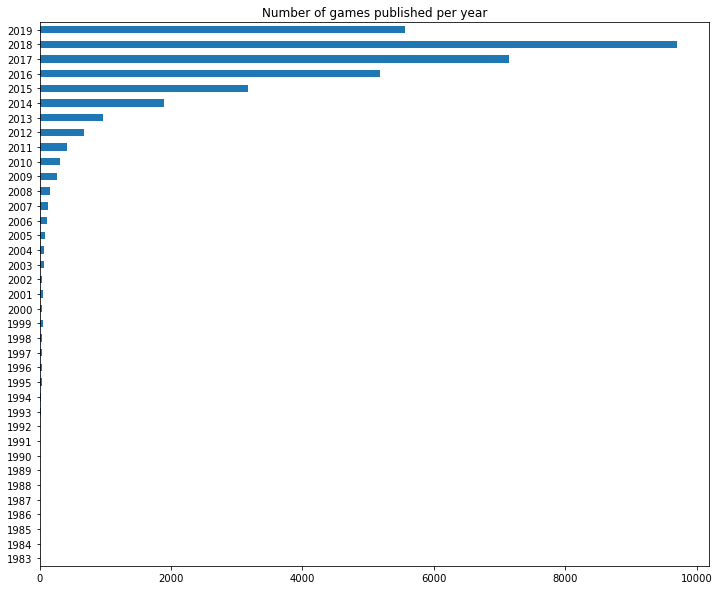

In [465]:
year_counts = df.groupby('release_date').size()
fig, ax = plt.subplots(figsize=(12, 10))
year_counts.plot(kind='barh', ax=ax)
plt.title('Number of games published per year')
plt.ylabel('')
plt.show()

Almost all of our games were published between 2013 and 2019 

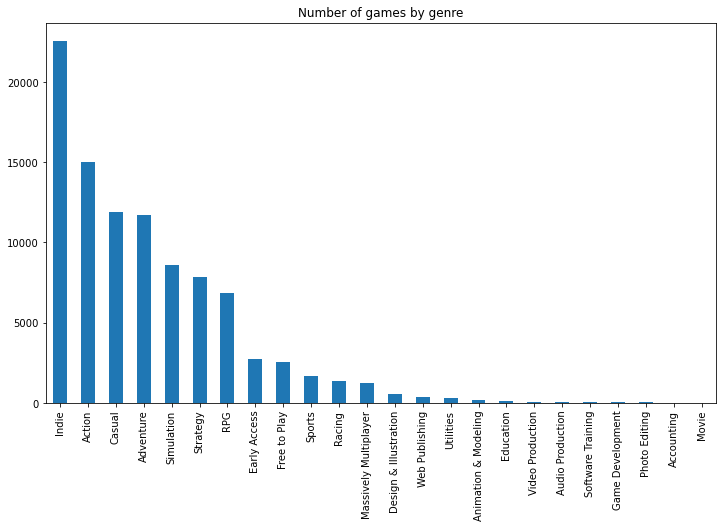

In [466]:
genre_df = df.assign(genre=df['genre'].str.split(',')).explode('genre')
genre_counts = genre_df.groupby('genre').size()
genre_counts = genre_counts.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 7))
genre_counts.plot(kind='bar')
plt.title('Number of games by genre')
plt.ylabel('')
plt.xlabel('')
plt.show()

Indie is definitely the most popular genre. At the same time, we can see that our bar chart can be splited in two parts.First part is visible and second almost none. Second part of genres has a very small amount of games, all of them combined will be less than any genre from top 4

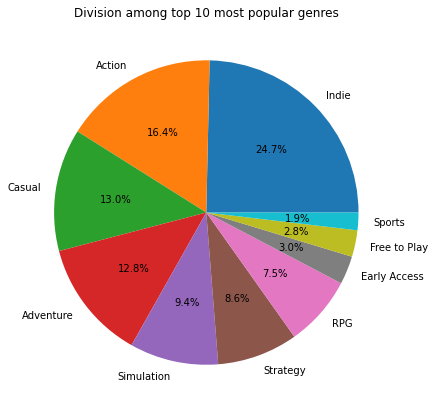

In [467]:
genre_counts = genre_df.groupby('genre').size()
genre_counts = genre_counts.sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(12, 7))
genre_counts.plot(kind='pie',autopct='%1.1f%%')
plt.title('Division among top 10 most popular genres')
plt.ylabel("")
plt.show()

This pie chart perfectly demonstrates how popular Indie is. This genre takes almost nearly 1/4 between top 10 most popular genres. Allso, we can see some sort of groups here. Simulation, Strategy and Rpg are in category 7.5-9.5 %. While right after them there is a category 1.9-3% between other 3 genres

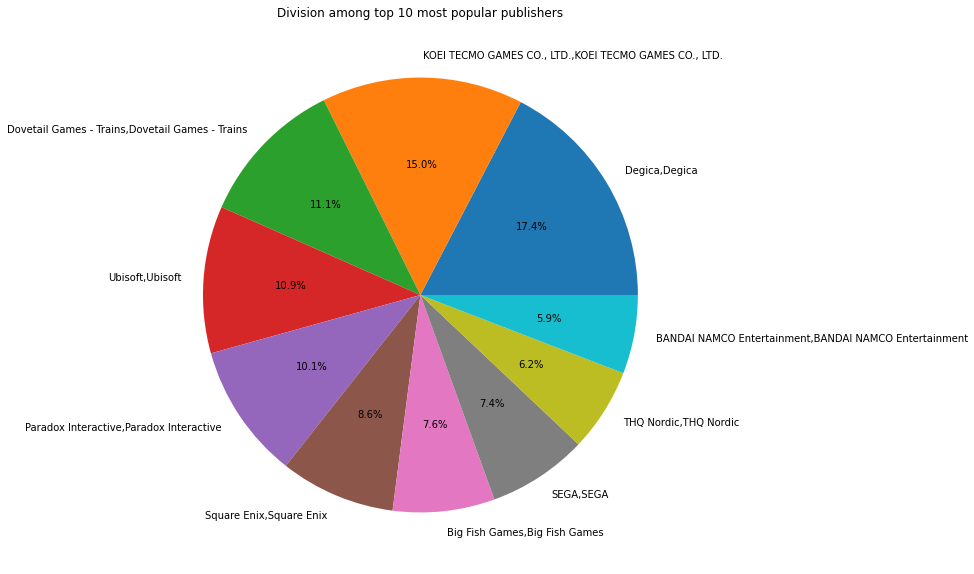

In [468]:
popular_publisher = df.groupby('publisher').size()
popular_publisher = popular_publisher.sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(16, 10))
popular_publisher.plot(kind='pie',autopct='%1.1f%%')
plt.title('Division among top 10 most popular publishers')
plt.ylabel('')
plt.show()

There is no such domination between publishers as we saw in genres top 10 pie chart. Even 10th place still has almost 6%

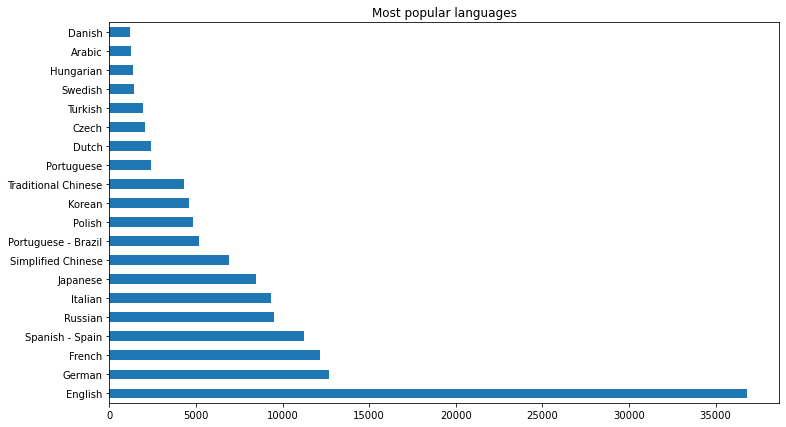

In [469]:
language_df = df.assign(languages=df['languages'].str.split(',')).explode('languages')
language_counts = language_df.groupby('languages').size()
language_counts = language_counts.sort_values(ascending=False).head(20)
fig, ax = plt.subplots(figsize=(12, 7))
language_counts.plot(kind='barh')
plt.title('Most popular languages')
plt.ylabel('')
plt.show()

In total we have about 37 000 games in our cleaned data set, using this bar chart it is clear that all of the games has English language in it. Next ones are German, French and Spanish, they have more than 10 000 values. So 1/3 of games has them. There is no surprise here, top languages are from the biggest and the same time richest countries. Also, take a look that we have Portuguese and Portuguese-Brazil. Let's find if it is possible that both languages will be in the same game 

In [470]:
language_df[language_df['name']=="PLAYERUNKNOWN'S BATTLEGROUNDS"]

,name,all_reviews,release_date,publisher,game_details,languages,genre,original_price
1,PLAYERUNKNOWN'S BATTLEGROUNDS,Mixed,2017,"PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats",English,"Action,Adventure,Massively Multiplayer",29.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,Mixed,2017,"PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats",Korean,"Action,Adventure,Massively Multiplayer",29.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,Mixed,2017,"PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats",Simplified Chinese,"Action,Adventure,Massively Multiplayer",29.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,Mixed,2017,"PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats",French,"Action,Adventure,Massively Multiplayer",29.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,Mixed,2017,"PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats",German,"Action,Adventure,Massively Multiplayer",29.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,Mixed,2017,"PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats",Spanish - Spain,"Action,Adventure,Massively Multiplayer",29.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,Mixed,2017,"PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats",Arabic,"Action,Adventure,Massively Multiplayer",29.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,Mixed,2017,"PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats",Japanese,"Action,Adventure,Massively Multiplayer",29.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,Mixed,2017,"PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats",Polish,"Action,Adventure,Massively Multiplayer",29.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,Mixed,2017,"PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats",Portuguese,"Action,Adventure,Massively Multiplayer",29.99


 I chose PUBG as an example and we can see here that both languages are presented in the game, so they are counted as different, for me personally it was a surprise because I thought that people speak same Portuguese, but seems like it has a significant difference between its language in Portugal and in Brazil

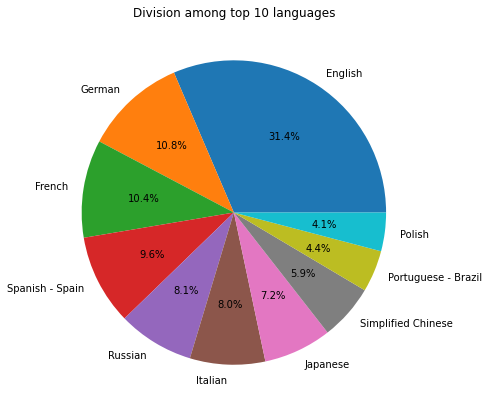

In [471]:
language_df = df.assign(languages=df['languages'].str.split(',')).explode('languages')
language_counts = language_df.groupby('languages').size()
language_counts = language_counts.sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(12, 7))
language_counts.plot(kind='pie',autopct='%1.1f%%')
plt.title('Division among top 10 languages')
plt.xlabel('')
plt.ylabel('')
plt.show()

This pie chart just strengthens previous conclusions regarding languages. 

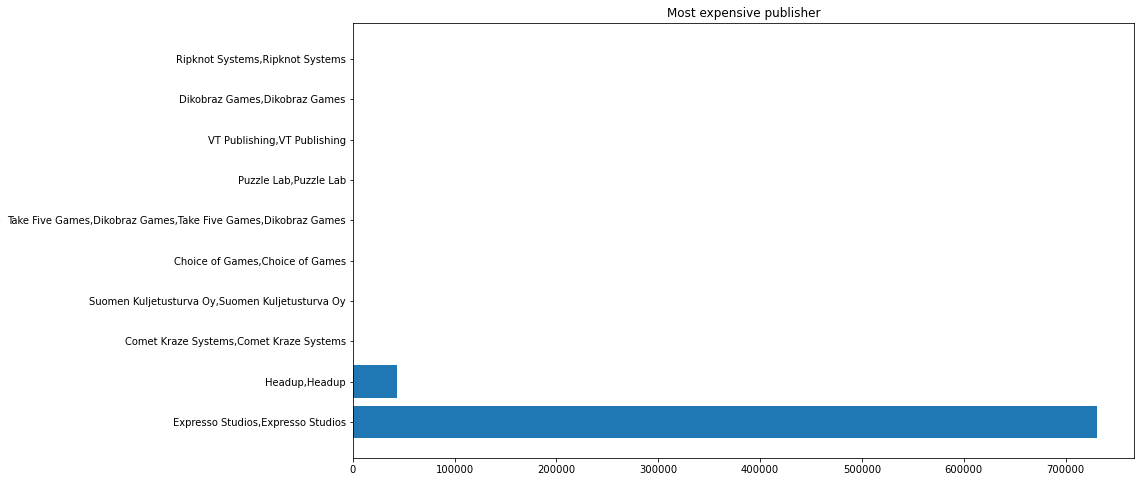

In [472]:
publisher_df=df.groupby('publisher')['original_price'].mean().sort_values(ascending=False).head(10)
fig,ax=plt.subplots(figsize=(14, 8))
plt.barh(publisher_df.index, publisher_df.values)
plt.title('Most expensive publisher')
plt.show()

Well... let's take a loot at this company. 

In [473]:
df[df['publisher']=='Expresso Studios,Expresso Studios']

,name,all_reviews,release_date,publisher,game_details,languages,genre,original_price
33936,Railgunners,Unknown,2019,"Expresso Studios,Expresso Studios","Single-player,Steam Achievements,Full controll...",English,"Action,Indie",730640.0


This company has only one game and mind blowing price for it. I checked manually, there is a number 730640 before download button in Steam, but I do not think that this is the actual price. Anyway this is not what we want to see here.

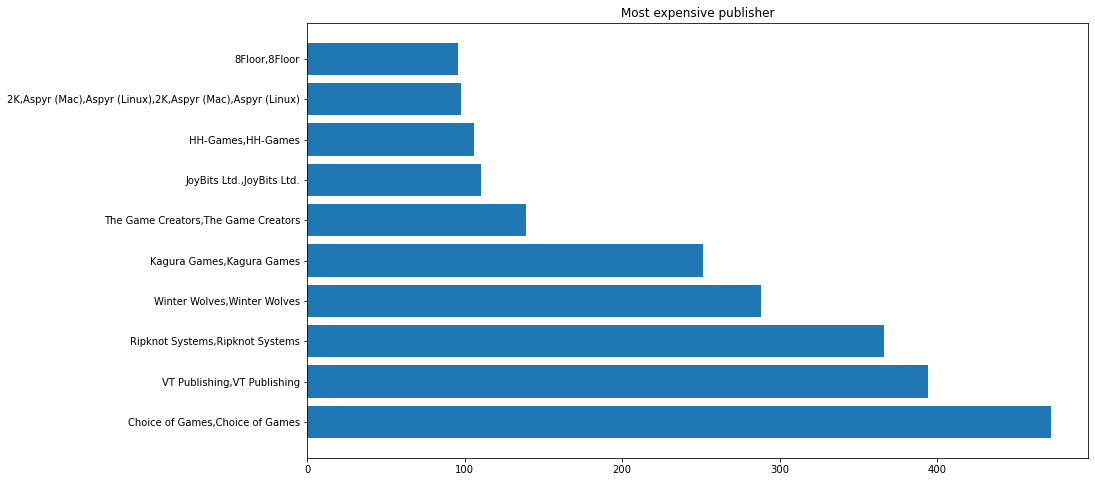

In [474]:
publisher_df=df.groupby('publisher').filter(lambda x: len(x) >= 20)\
            .groupby('publisher')['original_price'].mean().sort_values(ascending=False).head(10)
fig,ax=plt.subplots(figsize=(14, 8))
plt.barh(publisher_df.index, publisher_df.values)
plt.title('Most expensive publisher')
plt.show()

Now it makes more sense. I added a filter that each company should have at least 20 games published, let's do the opposite

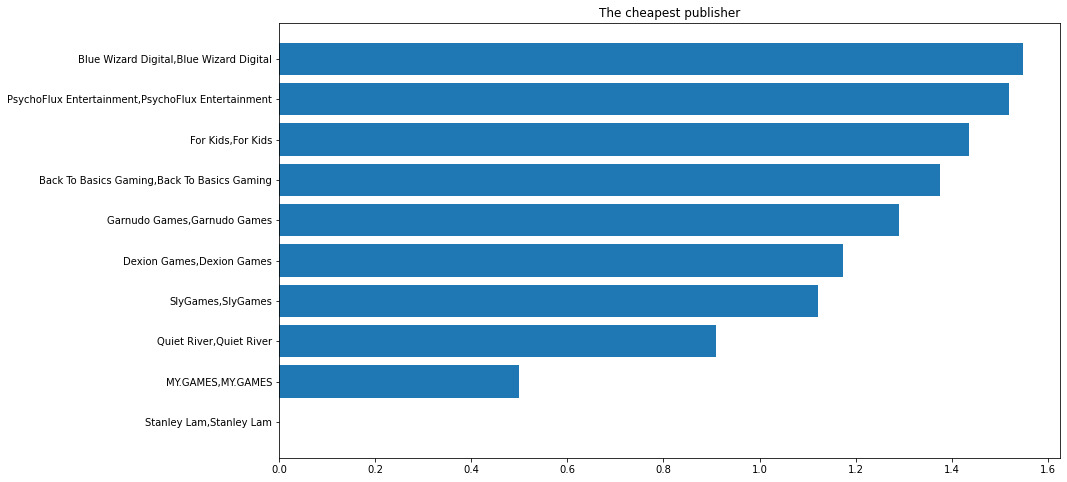

In [475]:
publisher_df=df.groupby('publisher').filter(lambda x: len(x) >= 20)\
            .groupby('publisher')['original_price'].mean().sort_values(ascending=True).head(10)
fig,ax=plt.subplots(figsize=(14, 8))
plt.barh(publisher_df.index, publisher_df.values)
plt.title('The cheapest publisher')
plt.show()

Here are the cheapest, looks like Stanley Lam creates only free games 

In [476]:
top_publishers = df['publisher'].value_counts().index[:10]
results = []
# iterate over the top publishers
for publisher in top_publishers:
    # filter the data by publisher
    publisher_df = genre_df[genre_df['publisher'] == publisher]
    # calculate the most popular genre for the publisher
    genre_counts = publisher_df.explode('genre')['genre'].value_counts()
    most_popular_genre = genre_counts.index[0]
    results.append({'publisher': publisher, 'most_popular_genre': most_popular_genre})
results

[{'publisher': 'Degica,Degica', 'most_popular_genre': 'Web Publishing'},
 {'publisher': 'KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO., LTD.',
  'most_popular_genre': 'Action'},
 {'publisher': 'Dovetail Games - Trains,Dovetail Games - Trains',
  'most_popular_genre': 'Simulation'},
 {'publisher': 'Ubisoft,Ubisoft', 'most_popular_genre': 'Simulation'},
 {'publisher': 'Paradox Interactive,Paradox Interactive',
  'most_popular_genre': 'Strategy'},
 {'publisher': 'Square Enix,Square Enix', 'most_popular_genre': 'Action'},
 {'publisher': 'Big Fish Games,Big Fish Games',
  'most_popular_genre': 'Casual'},
 {'publisher': 'SEGA,SEGA', 'most_popular_genre': 'Action'},
 {'publisher': 'THQ Nordic,THQ Nordic', 'most_popular_genre': 'Action'},
 {'publisher': 'BANDAI NAMCO Entertainment,BANDAI NAMCO Entertainment',
  'most_popular_genre': 'Action'}]

Now we have most popular genres from companies that have the biggest amount of games in our data set

unique most popular genres from top 10 publishers by amount of games 
['Action', 'Casual', 'Simulation', 'Web Publishing', 'Strategy']


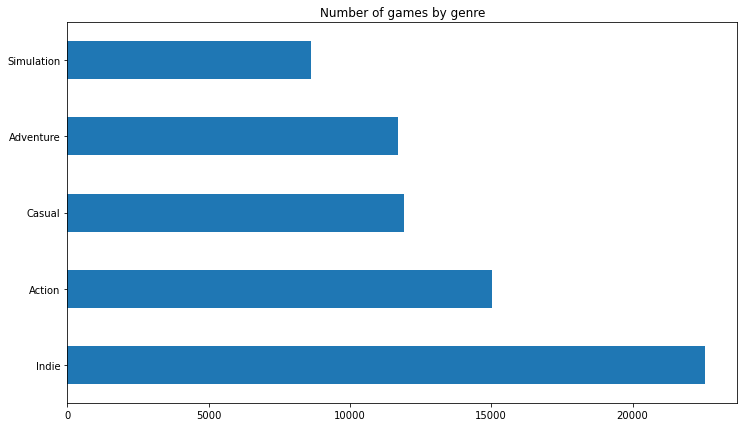

In [477]:
genres_most_publisher = list(set([result['most_popular_genre'] for result in results]))
print("unique most popular genres from top 10 publishers by amount of games ")
print(genres_most_publisher)

genre_df = df.assign(genre=df['genre'].str.split(',')).explode('genre')
genre_counts = genre_df.groupby('genre').size()
genre_counts = genre_counts.sort_values(ascending=False).head(5)
fig, ax = plt.subplots(figsize=(12, 7))
genre_counts.plot(kind='barh')
plt.title('Number of games by genre')
plt.ylabel('')
plt.xlabel('')
plt.show()

Surprisingly, that any of the top 10 publishers by amount of games,  have Indie as their most popular genre

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\PYTHON_ANACONDA\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


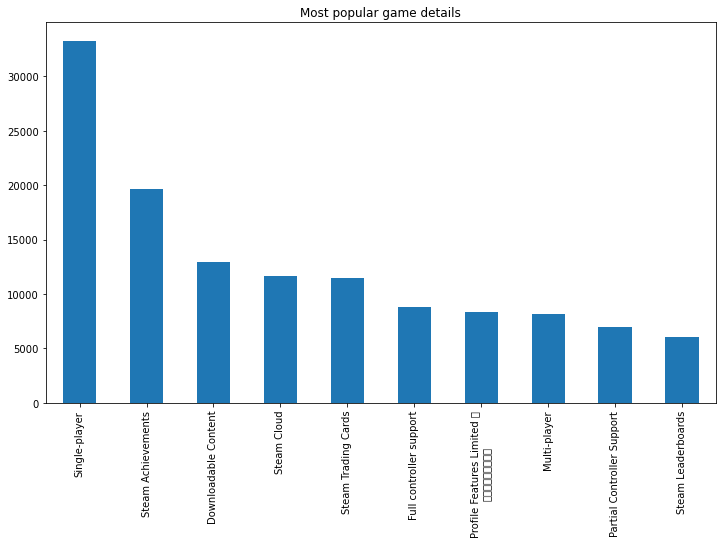

In [478]:
game_details_df = df.assign(game_details=df['game_details'].str.split(',')).explode('game_details')
details_counts = game_details_df.groupby('game_details').size()
details_counts = details_counts.sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(12, 7))
details_counts.plot(kind='bar')
plt.title('Most popular game details')
plt.ylabel('')
plt.xlabel('')
plt.show()

From here we can see that 90+% of games are single-player and roughly 1/3 has multi-player 

In [479]:
possible_review

['Mixed',
 'Mostly Positive',
 'Overwhelmingly Positive',
 'Positive',
 'Very Positive',
 'Very Negative',
 'Overwhelmingly Negative',
 'Negative',
 'Mostly Negative']

Now let's work on review column

In [480]:
#assign a number to each review depending
review_map={'Overwhelmingly Negative':1,
            'Very Negative':2,
            'Negative':3,
            'Mostly Negative':4,
            'Mixed':5,
            'Mostly Positive':6,
            'Positive':7,
            'Very Positive':8,
            'Overwhelmingly Positive':9 }

In [481]:
df=df.reset_index(drop=True)

In [482]:
df.replace({"all_reviews": review_map},inplace=True)

In [483]:
df_review = df[df['all_reviews'].notna() & (df['all_reviews'] != 'Unknown')]
df_review=df_review.reset_index(drop=True)

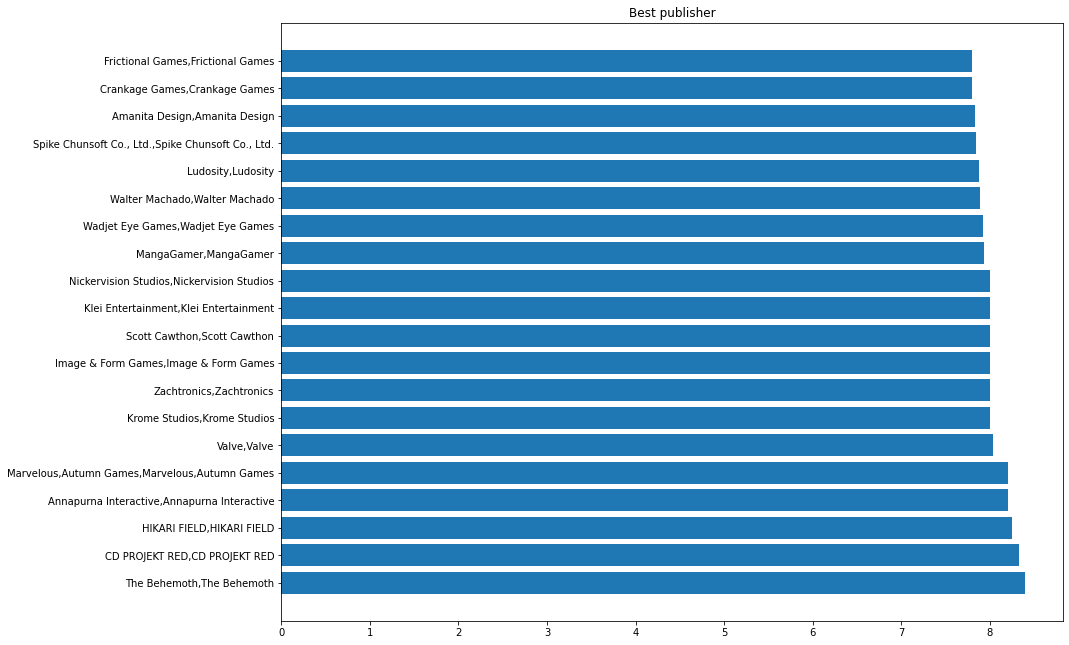

In [484]:
df_review['all_reviews'] = pd.to_numeric(df_review['all_reviews'])
publisher_review_df=df_review.groupby('publisher').filter(lambda x: len(x) >= 5)\
            .groupby('publisher')['all_reviews'].mean().sort_values(ascending=False).head(20)
fig,ax=plt.subplots(figsize=(14, 11))
plt.barh(publisher_review_df.index, publisher_review_df.values)
plt.title('Best publisher')
plt.show()

Here we can see publishers that have more than 5 games. Pretty descent that all they have nearly 8 on average or in another words 'Very Positive' review. We dont see there any publisher from 'most expensive publisher' chart

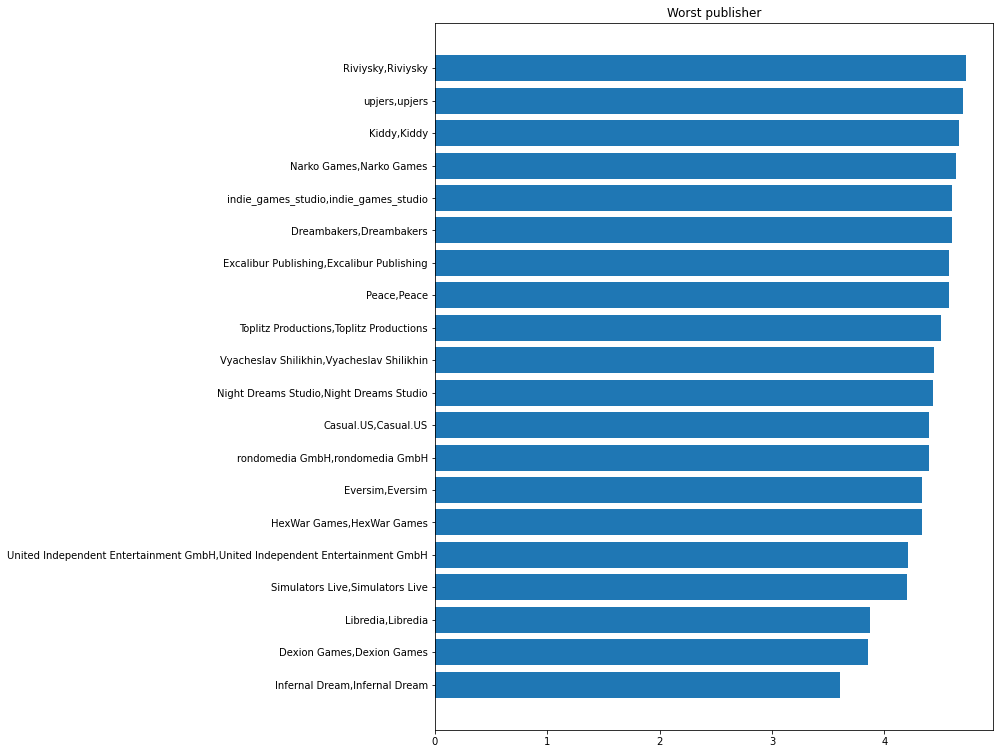

In [485]:
publisher_review_df=df_review.groupby('publisher').filter(lambda x: len(x) >= 5)\
            .groupby('publisher')['all_reviews'].mean().sort_values(ascending=True).head(20)
fig,ax=plt.subplots(figsize=(10, 13))
plt.barh(publisher_review_df.index, publisher_review_df.values)
plt.title('Worst publisher')
plt.show()

Here are the worst companies who have at least 5 games

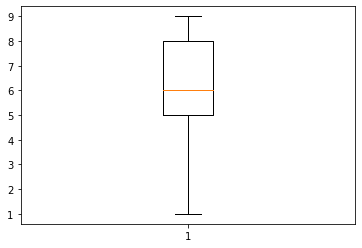

In [486]:
plt.boxplot(df_review['all_reviews'])
plt.show()

On average we have 'Mostly Positive' review in our data set. Mos Interesting that distance between Q3 and median two times higher then distance between Q1 and median, seems like we have a lot of 5 and 6. And of course min and max are 1 and 9

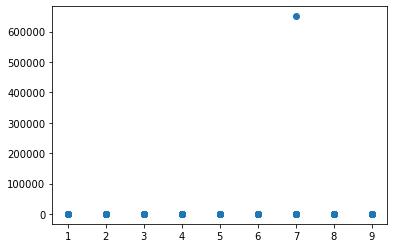

In [487]:
plt.scatter(df_review['all_reviews'],df_review['original_price'])
plt.show()

seems like there is one game that spolis scatter plot


In [488]:
df_review[df_review['original_price']>10000]

,name,all_reviews,release_date,publisher,game_details,languages,genre,original_price
10524,Slime-san: Superslime Edition,7,2017,"Headup,Headup","Single-player,Local Multi-Player,Local Co-op,S...",English,"Action,Adventure,Indie",650560.0


In [489]:
df_review = df_review.drop(10524).reset_index(drop=True)

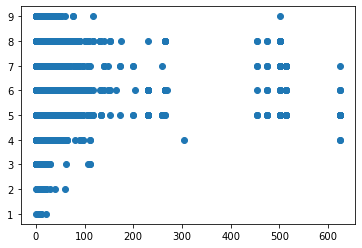

In [490]:
plt.scatter(df_review['original_price'],df_review['all_reviews'])
plt.show()

Much better now. First of all look at 9, our best possible value. On average it is less expensive then all other vaues except from 1 to 3. So, high price does not mean high quality as we can see. But at the same notice that a lot game with horrible score are free to play and this is the cheapest group.  'Very Negative' game are also quite cheap 





In [491]:
genre_df= genre_df[genre_df['all_reviews'].notna() & (genre_df['all_reviews'] != 'Unknown')]
genre_df=genre_df.reset_index(drop=True)
genre_df.replace({"all_reviews": review_map},inplace=True)
genre_df['all_reviews'] = pd.to_numeric(genre_df['all_reviews'])
genre_df

,name,all_reviews,release_date,publisher,game_details,languages,genre,original_price
0,DOOM,8,2016,"Bethesda Softworks,Bethesda Softworks","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,19.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,5,2017,"PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",Action,29.99
2,PLAYERUNKNOWN'S BATTLEGROUNDS,5,2017,"PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",Adventure,29.99
3,PLAYERUNKNOWN'S BATTLEGROUNDS,5,2017,"PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",Massively Multiplayer,29.99
4,BATTLETECH,6,2018,"Paradox Interactive,Paradox Interactive","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",Action,39.99
...,...,...,...,...,...,...,...,...
45013,Nanoui,4,2018,"Phoesion,Phoesion","Single-player,Multi-player,Online Multi-Player...",English,Action,6.99
45014,Nanoui,4,2018,"Phoesion,Phoesion","Single-player,Multi-player,Online Multi-Player...",English,Adventure,6.99
45015,Nanoui,4,2018,"Phoesion,Phoesion","Single-player,Multi-player,Online Multi-Player...",English,Casual,6.99
45016,Nanoui,4,2018,"Phoesion,Phoesion","Single-player,Multi-player,Online Multi-Player...",English,Indie,6.99


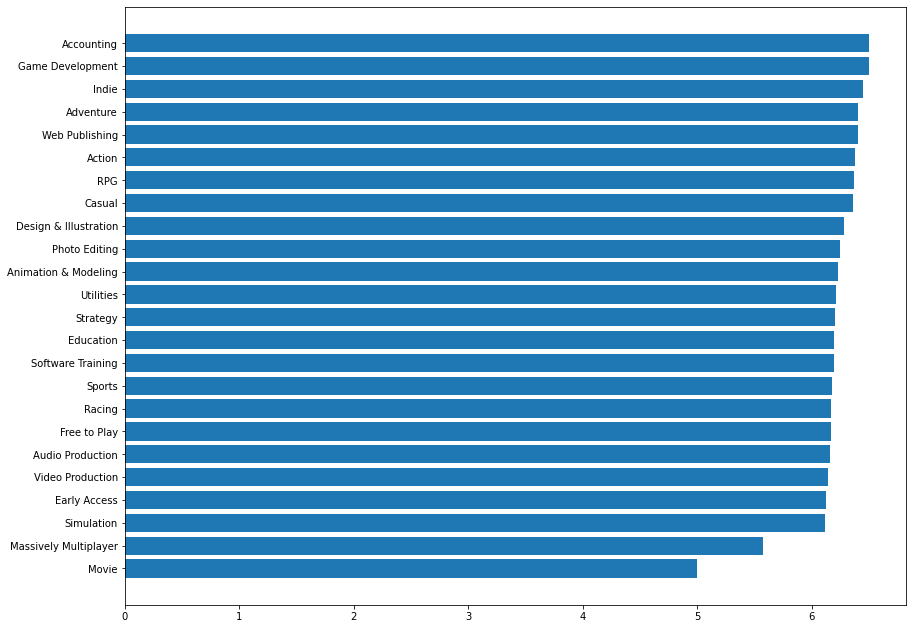

In [492]:
fig,ax=plt.subplots(figsize=(14, 11))
genre_average = genre_df.groupby('genre')['all_reviews'].mean()
genre_average=genre_average.sort_values()
plt.barh(genre_average.index,genre_average.values )
plt.show()

Our top 3 are Accounting, Game Development and Indie. Remember that Indie is by far the most popular genre in our data set, and even though it is one of the highest rated genre. Free to Play are in the second part of our bar chart, at the same time we saw that games with lowest reviews are mostly free or cheap. After all, all genres mostly have same average review. Massively Multiplayer and Movie are exceptions here and Movie is the only one genre that have average around 5

In [493]:
genre_df['all_reviews'].corr(genre_df['original_price'])

0.0041138306644641935

There is almost no correlation between reviews and genre 

# Summary

- most of games are from past years, we can assume that game development became more popular since 2009-2010
- every game has English language, 1/3 has Spanish, German and French. Usually populatiry depends from two factors: how big the population of the country and is the country developed enough.
- Indie is the most popular genre, at the same time it one of most highest rated genres. Also, neither from top 10 publishers by amount of games has Indie as top genre
- almost all games have an option to play single-player regeme, why less then 1/3 of games have multi-player
- 6 which stands for 'Mostly Positive' is an average review for games. Most of games are in range 5-8, which means that are more positive reviews
- previous statement also confirms when we will take a look at average review by genre. Almost all genres have nearly, exactly or a little bit more than 6 as their average review. Genres 'Massively Multiplayer' and 'Movie' are exceptions and 'Movie' is the only one genre that has average close to 5
- all games that have smallest possible reviews (1 and 2) are cheap. At the same time games with highest possible review (9) on average are cheaper than games with lower reviews.In general, there is no correlation between prices and reviews

# Conclusion from data set

### While buying a game remember that price does not guarantee the quality, yes, in category of worst reviews there are a lot of cheap and free to play games, but on the other hand in category 'games with best reviews' there are different prices and on average they are lower than others. In case if you want to create a game, it does not really matter which genre you will pick, as we saw there are a lot of genres, but almost all of them have same review on average, except for the 'Movie' genre, maybe this not the best choice. 